In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ref_src  = cv2.imread('./img/refShapes.jpg')
ref_gray = cv2.cvtColor(ref_src, cv2.COLOR_BGR2GRAY)
threshold, ref_bin = cv2.threshold(ref_gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [6]:
test_src  = cv2.imread('./img/testShapes1.jpg')
test_gray = cv2.cvtColor(test_src, cv2.COLOR_BGR2GRAY)
threshold2, test_bin = cv2.threshold(test_gray, 0, 255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [10]:
mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
ref_contours, _ = cv2.findContours(ref_bin, mode, method)
test_contours,_ = cv2.findContours(test_bin, mode, method)

In [13]:
ref_dst = ref_src.copy()
colors = ((0,0,255), (0,255,0), (255,0,0))
for i, cnt in enumerate(ref_contours):
    cv2.drawContours(ref_dst, [cnt], 0, colors[i], 2)

In [15]:
test_dst = test_src.copy()
method = cv2.CONTOURS_MATCH_I1    
for i, cnt1 in enumerate(test_contours):
    matches = []
    for cnt2 in ref_contours:
        ret = cv2.matchShapes(cnt1, cnt2, method, 0) ##################
        matches.append(ret)
    k = np.argmin(matches)
    cv2.drawContours(test_dst, [cnt1], 0, colors[k], 2)

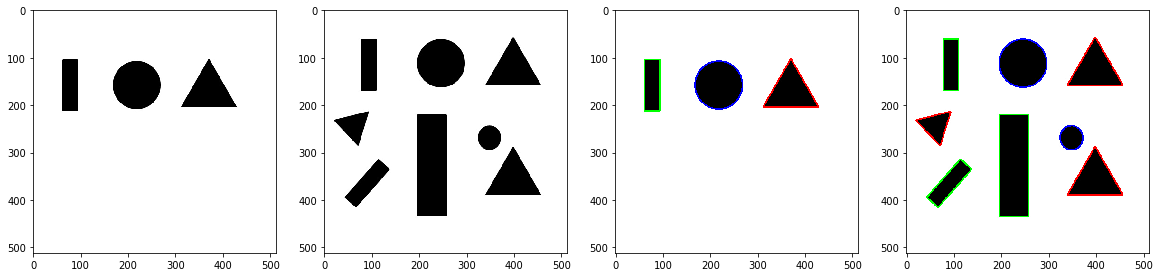

In [19]:
plt.figure(figsize=(20,80))

plt.subplot(1,4,1)
plt.imshow(ref_gray,cmap='gray')

plt.subplot(1,4,2)
plt.imshow(test_gray,cmap='gray')

plt.subplot(1,4,3)
plt.imshow(ref_dst)

plt.subplot(1,4,4)
plt.imshow(test_dst)

plt.show()